<img src="https://miro.medium.com/max/1898/1*w4TIZ1VIu7J2FltbyZ6bYA.png" align='left' />

# Desafio 3 - [Competição Titanic](https://www.kaggle.com/c/titanic/overview)

ENTREGA ATÉ 13/08 NO DRIVE https://drive.google.com/drive/folders/12x-QBlp7yASKF2TkdyaQ2TXXwtEicwYu?usp=sharing

Nesse desafio vamos trabalhar com uma competição do Kaggle pela primeira vez. O objetivo da competição é criar um modelo que consiga prever quais passageiros morreram e quais sobreviveram no acidente do Titanic.

A comunidade do Kaggle disponibiliza os notebooks com possíveis soluções para a competição. É uma fonte super rica de aprendizado entender as ideias que outras pessoas tiveram e ver as aplicações dessas ideias. Não hesitem em consultar! (Só não vale copiar a solução das pessoas na íntegra hehe)

Abaixo deixamos um passo-a-passo dos macro blocos para nortear vocês! Esse Desafio é uma ótima oportunidade para juntarmos os bloquinhos de Lego e vermos as aplicações de boa parte das técnicas e conceitos vistos até agora! Bora lá!

# 1. Importar libs e carregar os DataFrames

Nas competições do Kaggle é comum recebermos 2 DataFrames. Um de treino e um de teste. Neste caso o DataFrame de **teste** é utilizado apenas para gerar o Score do modelo na competição. Nós realizamos todas as etapas no DataFrame de treino e utilizamos o teste apenas para submeter a solução.

In [80]:
# Importando libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from imblearn.under_sampling import NearMiss
import warnings
warnings.filterwarnings('ignore')

1) Carregar dataframes de treino e teste 

2) Split o dataframe de treino

3) Limpar os dados - verificar dados duplicados, verificar se todas as features serão interessantes (variancia)

4) EDA e tratar nulos

5) Feature engineering

6) Preparar dados para o modelo de acordo com a necessidade de cada algoritmo

7) Modelagem: Usar como modelo 1 regressao logística, modelo 2 a árvore de decisão e modelo 3 KNN

8) Avaliar cada modelo e escolha do threshold

9) Escolher o melhor modelo dos passos anteriores 

10) Para o melhor modelo escolhido, repetir a modelagem usando k-fold

11) Balanceamento de dados

<img src=dict.jpg align='left' />

## Legenda das variáveis

# 1. Importar dados de treino e teste

Conforme vimos nas aulas, antes de começar a trabalhar com os dados, nós separamos uma parte do DataFrame para posterior avaliação do modelo. É importante que o modelo não tenha contato com nenhuma informação deste DataFrame separado para garantir que quando avaliada sobre este DataFrame, a performance do modelo reflita o comportamento do mesmo para dados nunca vistos.

In [81]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2. Limpeza de Dados

Agora, vamos verificar a consistência dos dados. Hora de identificar e tratar valores nulos, remover linhas e/ou colunas duplicadas, identificar e remover inconsistências nos valores das variáveis (Ex. se houver Fare negativo, não faz sentido), identificar e remover colunas constantes, quase constantes e com baixa variância. (Uma boa dica é voltar lá no Módulo 0 e revisitar a aula de Limpeza de Dados).

In [84]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Temos um número considerável de valores nulos na coluna `Age`.  
## Vamos tratar esse problema

Média de idade:  29.69911764705882
Média de idade:  14.526497332334044


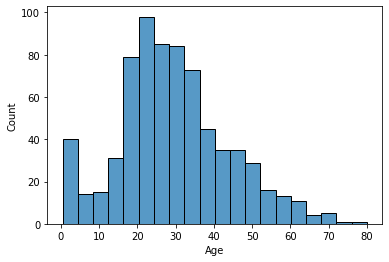

In [86]:
ages = sns.histplot(data=train['Age'])
print('Média de idade: ', train['Age'].mean())
print('Média de idade: ', train['Age'].std())

A distribuição de idades tem  
- média de 29.69 anos
- desvio-padrão de 15.52 anos

In [87]:
age_survived = train['Age'].loc[train['Survived'] == 1]
age_survived

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

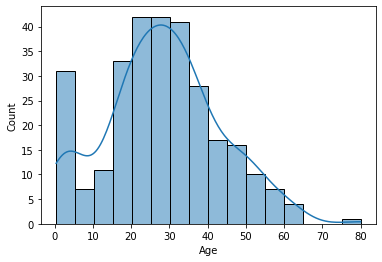

In [88]:
sns.histplot(data=age_survived, kde=True)

In [89]:
#Vamos substituir os valores nulos pela média e verificar como a distribuição fica
indexes = train['Age'].loc[train['Age'].isna()].index
mean = train['Age'].mean()
dp = train['Age'].std()
fill_mean = {i:mean for i in indexes[0:len(indexes)//3]}
fill_dp1 = {i:mean+(dp/2) for i in indexes[len(indexes)//3:(len(indexes)//3)*2]}
fill_dp2 = {i:mean-(dp/2) for i in indexes[(len(indexes)//3)*2:]}
fill = {**fill_mean, **fill_dp1, **fill_dp2}
age_fill = train['Age'].fillna(fill, axis=0)
train['Age'] = age_fill

In [90]:
age_fill.mean()

29.69911764705876

<AxesSubplot:xlabel='Age', ylabel='Count'>

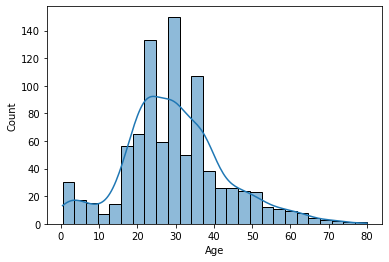

In [91]:
sns.histplot(data=age_fill, kde=True)

In [92]:
train.duplicated().sum()

0

In [93]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## `Embarked` possui 2 valores nulos, vamos substituílos pela maioria, ou seja `S`

In [94]:
train['Embarked'].fillna('S', inplace=True)

# 3. Análise Exploratória de Dados (EDA) 

Hora de conhecer os dados! Entender qual é a variável target, o que cada uma das colunas representa, quais as variáveis qualitativas, quais as variáveis quantitativas, observar as distribuições das variáveis e observar relações das variáveis com o target e entre si. Super válido procurar mais informações sobre o Titanic também (maior entendimento do negócio). Como funcionava a venda de passagens? Como as cabines eram distribuídas no navio?

Qual é o tipo de problema que vamos tentar resolver? É um problema de aprendizado supervisionado ou não supervisionado? Regressão ou Classificação?

In [95]:
train.shape

(891, 12)

In [96]:
test.shape

(418, 11)

In [97]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [98]:
train.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [99]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             91
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [100]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.268265,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.962366,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
survived_class = train.groupby(['Pclass'])['Survived'].sum()
survived_class

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

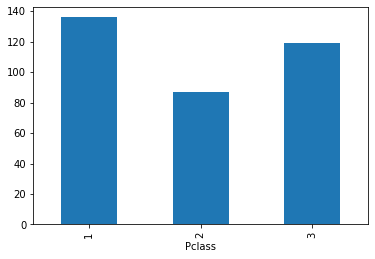

In [102]:
survived_class.plot.bar()
plt.show()

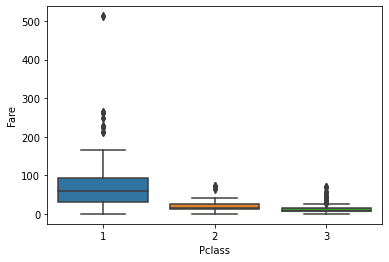

In [103]:
fare_class = sns.boxplot(data=train, x='Pclass', y='Fare')

In [104]:
train.groupby(['Sex', 'Survived', 'Pclass'])['Fare'].agg(['mean', 'max', 'min'])

mean       max      min
Sex    Survived Pclass                               
female 0        1       110.604167  151.5500  28.7125
                2        18.250000   26.0000  10.5000
                3        19.773093   69.5500   6.7500
       1        1       105.978159  512.3292  25.9292
                2        22.288989   65.0000  10.5000
                3        12.464526   31.3875   7.2250
male   0        1        62.894910  263.0000   0.0000
                2        19.488965   73.5000   0.0000
                3        12.204469   69.5500   0.0000
       1        1        74.637320  512.3292  26.2875
                2        21.095100   39.0000  10.5000
                3        15.579696   56.4958   0.0000

In [105]:
sib_surv = train.groupby(['SibSp'])['Survived'].sum()
sib_surv

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

<AxesSubplot:xlabel='SibSp'>

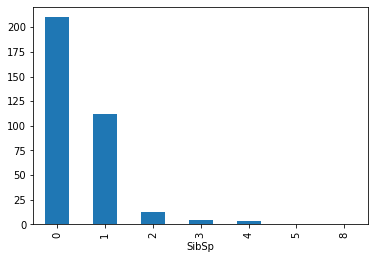

In [106]:
sib_surv.plot.bar()

In [107]:
parch_surv = train.groupby(['Parch'])['Survived'].sum()
parch_surv

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Parch'>

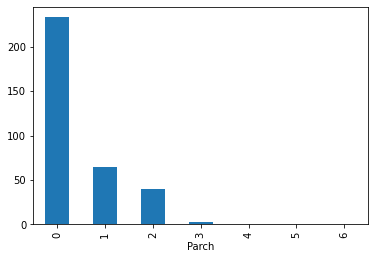

In [108]:
parch_surv.plot.bar()

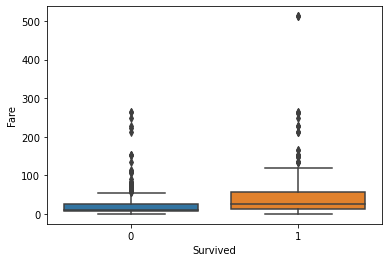

In [109]:
fare_survived = sns.boxplot(data=train, x='Survived', y='Fare')

In [110]:
sex_survived = train.groupby(['Sex'])['Survived'].sum()
sex_survived

Sex
female    233
male      109
Name: Survived, dtype: int64

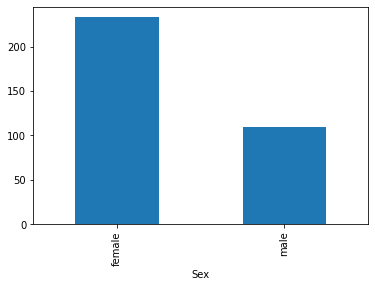

In [111]:
sex_survived.plot.bar()
plt.show()

In [112]:
embarked_surv = train.groupby(['Embarked'])['Survived'].sum()
embarked_surv

Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked'>

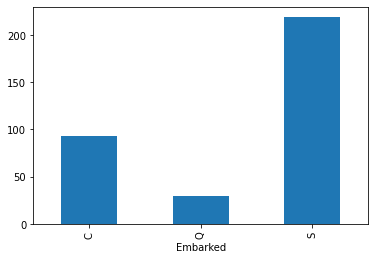

In [113]:
embarked_surv.plot.bar()

# Inferências

## Podemos obter as seguintes conclusões com a exploração de dados acima:

<ul>
    <li><b>A maior parte dos sobreviventes pertencia à classe 1</b></li>
    <li><b>A maior parte dos sobreviventes possuia no máximo 2 filhos ou companheiros</b></li>
    <li><b>A maior parte dos sobreviventes tinha idade entre 15 e 40 anos, com média de 29,6 anos</b></li>
    <li><b>A maior parte dos sobreviventes era do sexo feminino</b></li>
    <li><b>A maior parte dos sobreviventes embarcou em Southampton</b></li>
</ul>
    

Trata-se de um problema de Classificação, uma vez que nossa variável target (Survived) é uma variável categórica binária (só assume valor 0 ou 1). Além disso, sabemos se tratar de um problema de aprendizado supervisionado, dado que para treinar nosso modelo conhecemos o label de cada passageiro, isto é se ele sobreviveu ou não.

# 4. Feature Engineering

Agora que temos os dados limpos e entendemos um pouco mais do problema de negócio, hora de tentar criar variáveis, a partir das existentes, para aumentar a explicabilidade do modelo. 

Deixo algumas ideias aqui: será que o fato de o número da cabine ser nulo têm alguma influência sobre a probabilidade de a pessoa sobreviver ou não? Na variável com o nome do passageiro, temos o título (Mr., Mrs., etc). Será que o título, de alguma forma, contribui para a probabilidade de sobrevivência?

Usem a criatividade e, principalmente, testem várias coisas diferentes!!

In [114]:
def anota(ax):
    for bar in ax.patches:
        valor = bar.get_height()
        x = bar.get_x()+bar.get_width()/2
        ax.annotate(valor, xy=(x, valor+.4), ha='center')

In [115]:
#Apenas 206 pessoas com cabine nula sobreviveram, 
null_cabin_survivors = train.loc[train['Cabin'].isna()]['Survived'].sum()
null_cabin_survivors

206

In [116]:
#Isso corresponde a aproximadamente 60% dos sobreviventes
surv = train['Survived'].sum()
null_cabin_survivors/surv

0.6023391812865497

In [117]:
non_null_survivors = surv - null_cabin_survivors
non_null_survivors

136

In [118]:
#Já os sobreviventes com cabine determinada correspondem a aproximadamente 40%
non_null_survivors/surv

0.39766081871345027

In [119]:
#Vamos analisar como são as cabines
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [120]:
cabines_sobreviventes = train.loc[train['Survived'] == 1]['Cabin'].dropna().str.split()
cabines_mortos = train.loc[train['Survived'] == 0]['Cabin'].dropna().str.split()
letra_sobrevivente = []
letra_morto = []
for cabine in cabines_sobreviventes:
    if len(cabine)>1:
        for i in cabine:
            letra_sobrevivente.append(i[0])
    else:    
        letra_sobrevivente.append(cabine[0][0])
        
for cabine in cabines_mortos:
    if len(cabine)>1:
        for i in cabine:
            letra_morto.append(i[0])
    else:    
        letra_morto.append(cabine[0][0])
        
sobreviventes = {}
mortos = {}
for i in letra_sobrevivente:
    sobreviventes[i] = letra_sobrevivente.count(i)

for i in letra_morto:
    mortos[i] = letra_morto.count(i)
sobreviventes = pd.Series(sobreviventes)
mortos = pd.Series(mortos)
total = mortos + sobreviventes

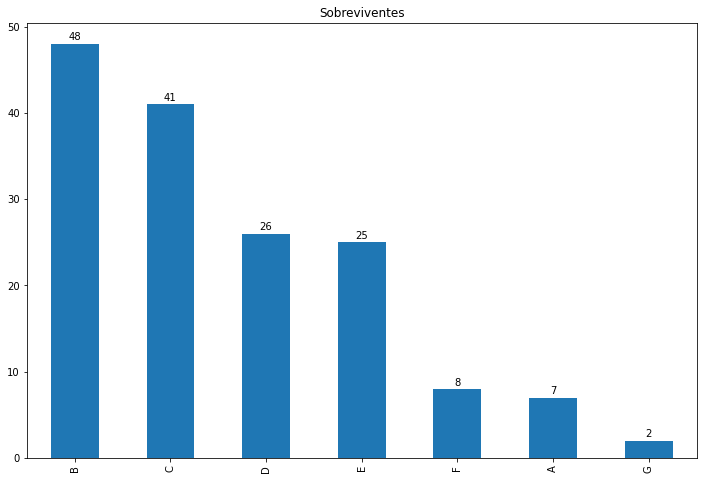

In [121]:
ax1 = sobreviventes.sort_values(ascending=False).plot.bar(title='Sobreviventes', figsize=(12,8))
anota(ax1)

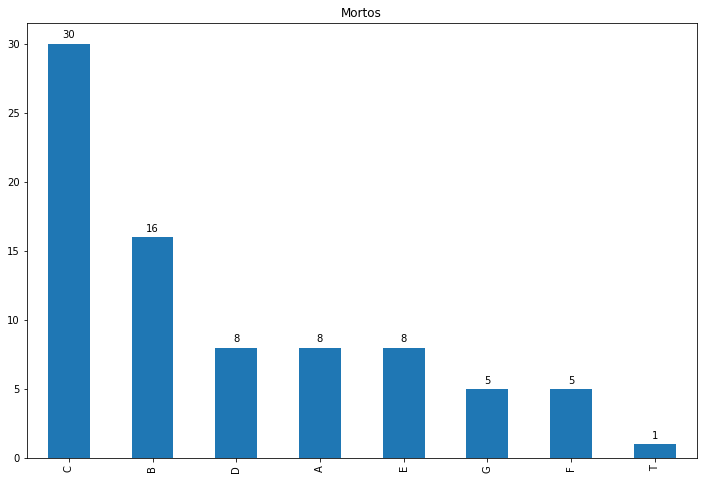

In [122]:
ax2 = mortos.sort_values(ascending=False).plot.bar(title='Mortos', figsize=(12,8))
anota(ax2)

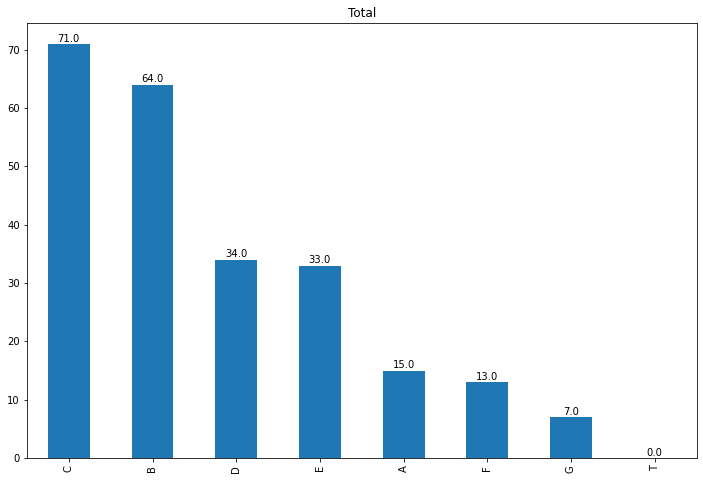

In [123]:
ax3 = total.sort_values(ascending=False).plot.bar(title='Total', figsize=(12,8))
anota(ax3)

Podemos observar que a quantidade de sobreviventes e mortos estão em relativo equilibrio, ou seja, as cabines com mais registros possuem tanto mais sobreviventes quanto mais mortos, já as com menos registros apresentam menos sobreviventes e menos mortos, com essa distribuição, é conveniente retirar a coluna `Cabin` do nosso modelo

## Vamos agora analisar os sobreviventes de acordo com seus títulos

In [124]:
nomes_sobreviventes = train.loc[train['Survived'] == 1]['Name'].str.split()
nomes_mortos = train.loc[train['Survived'] == 0]['Name'].str.split()
titulos_sobreviventes = []
titulos_mortos = []
for nome in nomes_sobreviventes:
    if nome[1][-1] == '.':
        titulos_sobreviventes.append(nome[1])
    else:
        for i in nome:
            if i[-1] == '.':
                titulos_sobreviventes.append(i)
                
for nome in nomes_mortos:
    if nome[1][-1] == '.':
        titulos_mortos.append(nome[1])
    else:
        for i in nome:
            if i[-1] == '.':
                titulos_mortos.append(i)

contagem_sobreviventes = {}
contagem_mortos = {}
for titulo in titulos_sobreviventes:
    contagem_sobreviventes[titulo] = titulos_sobreviventes.count(titulo)
for titulo in titulos_mortos:
    contagem_mortos[titulo] = titulos_mortos.count(titulo)
titles_survived = pd.Series(contagem_sobreviventes)
titles_dead = pd.Series(contagem_mortos)

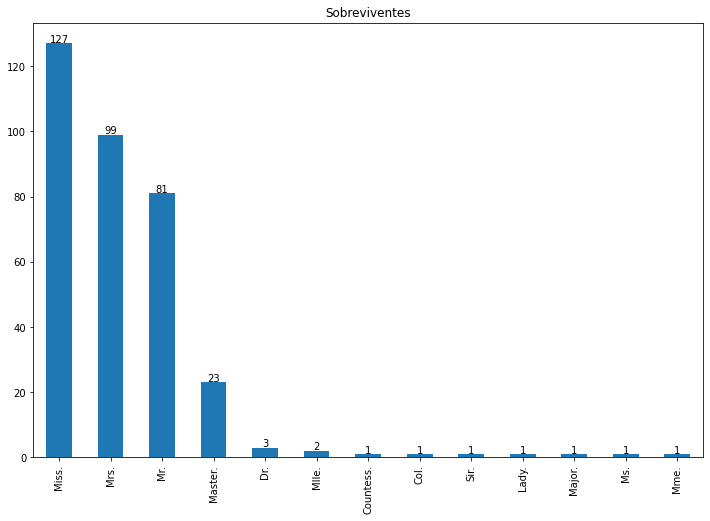

In [125]:
ax1 = titles_survived.sort_values(ascending=False).plot.bar(title='Sobreviventes', figsize=(12,8))
anota(ax1)

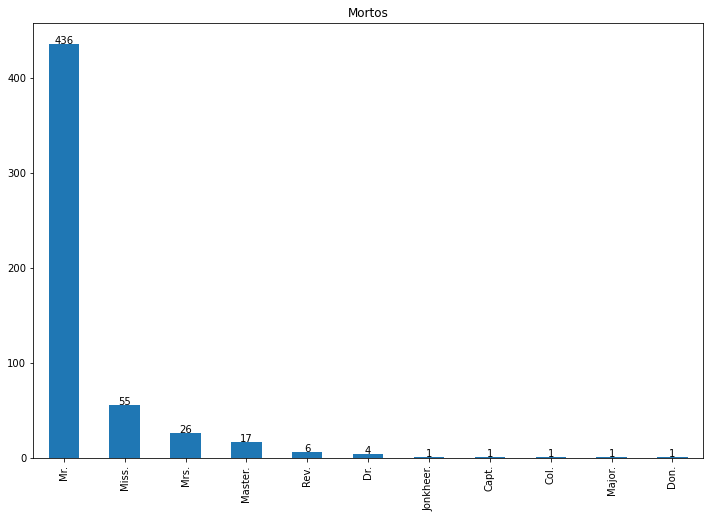

In [126]:
ax2 = titles_dead.sort_values(ascending=False).plot.bar(title='Mortos', figsize=(12,8))
anota(ax2)

Podemos notar que há muito mais sobreviventes com os títulos femininos `Miss.` e `Mrs.` enquanto há um notável número de pessoas com o título masculino `Mr.` que não sobreviveram. Isso reforça a observação anterior de que houveram mais sobreviventes do sexo feminino do que do sexo masculino. Há ainda algumas poucas com títulos feminos diferentes como `Lady` e `Countess`, que possuem um grau maior de distinção, que também sobreviveram.  
Conclusão: há fortes indícios de que o título influencia na chance de sobrevivência da pessoa e será uma feature importante no nosso modelo

In [127]:
#Definindo a função para criar a coluna 'title'

def pega_titulo(df):
    nome = df.split()
    for i in range(len(nome)):
        if '.' in nome[i]:
            return nome[i]

In [128]:
#Extraindo os títulos dos nomes

train['Titulo'] = train['Name'].apply(pega_titulo)
train['Titulo'].isna().sum()#Verifica se todos os nomes possuem algum título

0

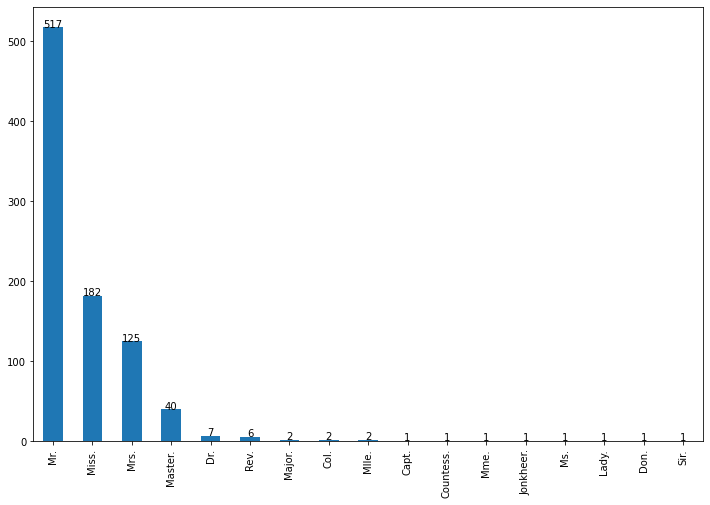

In [129]:
ax4 = train['Titulo'].value_counts().plot.bar(figsize=(12,8))
anota(ax4)

In [130]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr.


## Portanto, podemos definir as que as fetures que serão utilizadas no modelo são:  
- `Pclass`
- `Sex`
- `Age`
- `SibSp`
- `Parch`
- `Fare`
- `Titulo`
- `Embarked`

### e a variável alvo é: `Survived`

In [131]:
prep_data = pd.get_dummies(train, columns=['Sex', 'Titulo', 'Embarked'], drop_first=True)

In [132]:
X = prep_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
Y = prep_data['Survived']

# 5. Data Prep

Tendo em mãos as variáveis selecionadas, hora de pré processar esses dados para entrar no modelo. Importante lembrar os tipos de preparo de dados que cada algoritmo precisa (ex: KNN precisa de scaler, mas será que a árvore de decisão também precisa?)

In [133]:
age_scaler = MinMaxScaler().fit_transform(X[['Fare']])
fare_scaler = MinMaxScaler().fit_transform(X[['Age']])

In [134]:
X['Age'] = age_scaler
X['Fare'] = fare_scaler

# 6. Dividir o Dataset de Treino em treino e teste

Conforme vimos nas aulas, antes de começar a trabalhar com os dados, nós separamos uma parte do DataFrame para posterior avaliação do modelo. É importante que o modelo não tenha contato com nenhuma informação deste DataFrame separado para garantir que quando avaliada sobre este DataFrame, a performance do modelo reflita o comportamento do mesmo para dados nunca vistos.

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [136]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 24)
(223, 24)
(668,)
(223,)


# 7. Modelagem

Após o tratamento dos dados, podemos partir para a modelagem. Aqui vamos usar 3 tipos de modelos: regressão log (modelo 1), árvore de decisão (modelo 2), KNN (modelo 3)


In [137]:
log_reg = LogisticRegression().fit(x_train, y_train)

In [138]:
dec_tree = dtree().fit(x_train, y_train)

In [139]:
knn = KNN().fit(x_train, y_train)

# 8. Avaliação do Modelo e escolha do Threshold

Modelos treinados, agora bora avaliar a performance dele. Hora de fazer um predict nos dados de treino e de teste (que separamos no começo, ainda não chegou a hora de utilizarmos o dataset de teste fornecido pela competição).

A métrica da competição é Accuracy, mas nós vimos outras em aula e vale a pena calcular todas elas (Precision, Recall, F-beta, ROC AUC). 

Além disso, vale testar diferentes thresholds para todos os modelos para ver se alterando o threshold observamos aumento da performance do modelo. Lembrando que o default do scikit learn é 0.5 :)

Importante nos atentarmos às métricas de treino e teste. Lembrando que quando o modelo performa muito bem no treino e não tão bem no teste, este é um indicativo de overfitting. O modelo "decorou" os dados de treino, aprendendo, inclusive, o ruído e quando recebe dados nunca vistos, não performa bem. Caso as métricas de treino e teste sejam baixas, isto indica underfitting, ou seja, o modelo não é complexo o suficiente para representar, de forma satisfatória, o problema. Podemos tentar adicionar novas variáveis ou utilizar modelos mais complexos (de maior variância).

** Precision x Recall

In [140]:
#Modelos
models = [log_reg, dec_tree, knn]
labels = ['Logistic', 'Decision Tree', 'KNN']

In [141]:
print('Scores de Treino')
for label, model in zip(labels,models):
    print(f'{label} Accuracy Score: ', accuracy_score(y_train, model.predict(x_train)))
    print(f'{label} Precision Score: ', precision_score(y_train, model.predict(x_train)))
    print(f'{label} Recall Score: ', recall_score(y_train, model.predict(x_train)))
    print(f'{label} F-Beta Score: ', fbeta_score(y_train, model.predict(x_train), beta=0.5))
    print(f'{label} ROC-AUC Score: ', roc_auc_score(y_train, model.predict_proba(x_train)[:,1]))
    print('-'*50)

Scores de Treino
Logistic Accuracy Score:  0.844311377245509
Logistic Precision Score:  0.7942386831275721
Logistic Recall Score:  0.7813765182186235
Logistic F-Beta Score:  0.7916324856439706
Logistic ROC-AUC Score:  0.886928173714022
--------------------------------------------------
Decision Tree Accuracy Score:  0.9925149700598802
Decision Tree Precision Score:  0.9959016393442623
Decision Tree Recall Score:  0.9838056680161943
Decision Tree F-Beta Score:  0.9934587080948489
Decision Tree ROC-AUC Score:  0.9998653677863578
--------------------------------------------------
KNN Accuracy Score:  0.8532934131736527
KNN Precision Score:  0.8340807174887892
KNN Recall Score:  0.7530364372469636
KNN F-Beta Score:  0.8165057067603161
KNN ROC-AUC Score:  0.9310827314952831
--------------------------------------------------


In [142]:
print('Scores de Teste')
for label, model in zip(labels,models):
    print(f'{label} Accuracy Score: ', accuracy_score(y_test, model.predict(x_test)))
    print(f'{label} Precision Score: ', precision_score(y_test, model.predict(x_test)))
    print(f'{label} Recall Score: ', recall_score(y_test, model.predict(x_test)))
    print(f'{label} F-Beta Score: ', fbeta_score(y_test, model.predict(x_test), beta=0.5))
    print(f'{label} ROC-AUC Score: ', roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
    print('-'*50)

Scores de Teste
Logistic Accuracy Score:  0.8071748878923767
Logistic Precision Score:  0.8170731707317073
Logistic Recall Score:  0.7052631578947368
Logistic F-Beta Score:  0.7919621749408983
Logistic ROC-AUC Score:  0.8413651315789473
--------------------------------------------------
Decision Tree Accuracy Score:  0.7443946188340808
Decision Tree Precision Score:  0.7261904761904762
Decision Tree Recall Score:  0.6421052631578947
Decision Tree F-Beta Score:  0.7076566125290022
Decision Tree ROC-AUC Score:  0.7322368421052632
--------------------------------------------------
KNN Accuracy Score:  0.7937219730941704
KNN Precision Score:  0.8181818181818182
KNN Recall Score:  0.6631578947368421
KNN F-Beta Score:  0.781637717121588
KNN ROC-AUC Score:  0.8181743421052632
--------------------------------------------------


In [143]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])

In [144]:
len(thresholds)

82

In [145]:
accuracy = []
precision = []
recall = []
fbeta = []
for model in models:
    for t in thresholds:
        y_pred = np.where(model.predict_proba(x_test)[:,1]>t, 1, 0)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        fbeta.append(fbeta_score(y_test, y_pred, beta=0.5))
        
ts = [*thresholds, *thresholds, *thresholds]
    
accuracy_df = pd.concat([pd.Series(ts), pd.Series(accuracy), pd.Series(np.nan)], axis=1)
accuracy_df.columns = ['thresholds', 'accuracy', 'model']
accuracy_df['model'][0:82] = 'Logistic'
accuracy_df['model'][82:164] = 'Decision Tree'
accuracy_df['model'][164:] = 'KNN'
# accuracy_df.sort_values(by='accuracy')

precision_df = pd.concat([pd.Series(ts), pd.Series(precision), pd.Series(np.nan)], axis=1)
precision_df.columns = ['thresholds', 'precision', 'model']
precision_df['model'][0:82] = 'Logistic'
precision_df['model'][82:164] = 'Decision Tree'
precision_df['model'][164:] = 'KNN'
# precision_df.sort_values(by='precision', ascending=False, inplace=True)

recall_df = pd.concat([pd.Series(ts), pd.Series(recall), pd.Series(np.nan)], axis=1)
recall_df.columns = ['thresholds', 'recall', 'model']
recall_df['model'][0:82] = 'Logistic'
recall_df['model'][82:164] = 'Decision Tree'
recall_df['model'][164:] = 'KNN'
# recall_df.sort_values(by='recall', ascending=False, inplace=True)

fbeta_df = pd.concat([pd.Series(ts), pd.Series(fbeta), pd.Series(np.nan)], axis=1)
fbeta_df.columns = ['thresholds', 'fbeta', 'model']
fbeta_df['model'][0:82] = 'Logistic'
fbeta_df['model'][82:164] = 'Decision Tree'
fbeta_df['model'][164:] = 'KNN'
# fbeta_df.sort_values(by='fbeta', ascending=False, inplace=True)


In [146]:
accuracy_df.sort_values(by='accuracy', ascending=False).head()

,thresholds,accuracy,model
37,0.349375,0.811659,Logistic
26,0.473405,0.807175,Logistic
28,0.450638,0.807175,Logistic
30,0.405299,0.807175,Logistic
32,0.394482,0.807175,Logistic


In [147]:
precision_df.sort_values(by='precision', ascending=False).head()

,thresholds,precision,model
2,0.914444,1.000000,Logistic
3,0.911293,1.000000,Logistic
5,0.814548,0.972973,Logistic
4,0.817357,0.972222,Logistic
7,0.775500,0.952381,Logistic


In [148]:
recall_df.sort_values(by='recall', ascending=False).head()

,thresholds,recall,model
81,0.000651,1.000000,Logistic
79,0.042080,0.989474,Logistic
80,0.029153,0.989474,Logistic
77,0.045451,0.978947,Logistic
78,0.044370,0.978947,Logistic


In [149]:
fbeta_df.sort_values(by='fbeta', ascending=False).head()

,thresholds,fbeta,model
25,0.519639,0.795181,Logistic
26,0.473405,0.791962,Logistic
24,0.563637,0.789474,Logistic
28,0.450638,0.788863,Logistic
30,0.405299,0.785877,Logistic


## Podemos definir nosso `Threshold` ótimo como `0.349375` para a métrica `Accuracy`

# 9. Escolher o melhor modelo dos passos anteriores

Qual dos modelos avaliados anteriormente performou melhor? Todas as métricas desse modelo são melhores que as dos outros ou tem alguma que se destaca?

O modelo que melhor performou foi o de `Regressão Logística`, tanto seus scores de treino quanto de teste obetiveram resultados semelhantes, o que não indica que o modelo decorou os dados.  
  
  A métrica que mais se destaca é a `AUC`

In [150]:
#Exibir a matriz de confusão
cm = confusion_matrix(y_test, log_reg.predict(x_test))

print(f'Acertos: {cm[0,0] + cm[1,1]}')
print(f'Erros: {cm[0,1] + cm[1,0]}')
print(f'Total: {cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]}')

Acertos: 180
Erros: 43
Total: 223


# 10) Para o melhor modelo escolhido, repetir a modelagem usando k-fold

Aqui vamos repetir o passo de modelagem apenas para o melhor modelo, agora usando k-fold (k a escolha de vcs). Nossas métricas melhoraram? Vocês sabem explicar pra que o k-fold é usado?


In [151]:
folds = KFold(5)
accuracy = []
precision = []
recall = []
fbeta = []
roc_auc = []
for train_index, test_index in folds.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X.iloc[train_index], X.iloc[test_index]
    Y_Train, Y_Test = Y.iloc[train_index].T, Y.iloc[test_index]
    fit = LogisticRegression().fit(X_Train, Y_Train)
    accuracy.append(accuracy_score(Y_Test, fit.predict(X_Test)))
    precision.append(precision_score(Y_Test, fit.predict(X_Test)))
    recall.append(recall_score(Y_Test, fit.predict(X_Test)))
    fbeta.append(fbeta_score(Y_Test, fit.predict(X_Test), beta=0.5))
    roc_auc.append(roc_auc_score(Y_Test, fit.predict_proba(X_Test)[:,1]))

In [152]:
max(accuracy)

0.8820224719101124

In [153]:
max(precision)

0.821917808219178

In [154]:
max(recall)

0.8571428571428571

In [155]:
max(fbeta)

0.8256880733944955

In [156]:
max(roc_auc)

0.90904071773637

## Em comparação com as métricas obtidas na primeira modelagem, utilizando split de 0.25 para teste, nossas métricas melhoraram com o uso do K-Fold para 5 divisões dos dados

# 11) Balanceamento de dados

Seria interessante balancearmos os dados para esse caso? Por quê? As métricas melhoraram após o balanceamento? Testar somente para o melhor modelo avaliado e após o k-fold!

<AxesSubplot:>

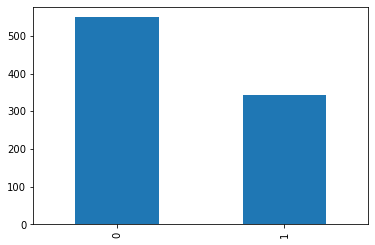

In [157]:
train['Survived'].value_counts().plot.bar()

In [158]:
print(classification_report(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       128
           1       0.82      0.71      0.76        95

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223



In [159]:
nm = NearMiss()

In [163]:
X, y = nm.fit_resample(X, Y)

In [168]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [169]:
log_reg_balanced = LogisticRegression()

In [174]:
log_reg_balanced.fit(x_train, y_train)

LogisticRegression()

In [175]:
print(classification_report(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        67
           1       0.86      0.70      0.77        70

    accuracy                           0.79       137
   macro avg       0.80      0.79      0.79       137
weighted avg       0.80      0.79      0.79       137



In [176]:
accuracy_score(y_test, log_reg_balanced.predict(x_test))

0.8394160583941606

## Nosso modelo não tem um ganho significativo após o balanceamento dos dados, na verdade, a métrica `Accuracy` tem uma pequena redução no seu valor, portanto, não é necessário fazer o balanceamento dos dados.